# 1) 언어 모델

언어 모델(Language Model, LM)은 언어라는 현상을 모델링하고자 단어 시퀀스(또는 문장)에 확률을 할당(assign)하는 모델입니다.

통계를 이용한 방법, 인공 신경망을 이용한 방법으로 분류할 수 있다. ( 최근에는 인공 신경망을 이용한 방법이 좋은 성능을 보여준다고한다.)

최근 핫한 자연어 처리의 신기술인 GPT나 BERT 또한 인공 신경망 언어 모델의 개념을 사용하여 만들어졌다.

이번 챔터에서는 언어 모델의 개념과 언어 모델의 전통적 접근 방식인 통계적 언어 모델에 대해서 배운다.

## 1. 언어모델
단어 시퀀스에 확률을 할당하게 하기 위해서 가장 보편적으로 사용되는 방법은 언어 모델이 이전 단어들이 주어졌을 때 다음 단어를 예측하도록 하는 것입니다.

다른 유형의 언어 모델로는 주어진 양쪽의 단어들로부터 가운데 비어있는 단어를 예측하는 언어 모델이 있습니다. (마지막 BERT 챕터에서 다룰 예정)

언어 모델에 -ing를 붙인 언어 모델링(Language Modeling)은 주어진 단어들로부터 아직 모르는 단어를 예측하는 작업을 말합니다. 즉, 언어 모델이 이전 단어들로부터 다음 단어를 예측하는 일은 언어 모델링입니다.

## 2. 단어 시퀀스의 확률 할당

자연어 처리에서 확률을 할당하는 일이 왜 필요한가?

### a. 기계번역
P(나는 버스를 탔다) > P(나는 버스를 태운다)

: 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합니다.
### b. 오타 교정
선생님이 교실로 부리나케

P(달려갔다) > P(잘려갔다)

: 언어 모델은 두 문장을 비교하여 좌측의 문장의 확률이 더 높다고 판단합니다.

### c. 음성 인식

P(나는 메롱을 먹는다) < P(나는 메론을 먹는다)

: 언어 모델은 두 문장을 비교하여 우측의 문장의 확률이 더 높다고 판단합니다.

언어 모델은 위와 같이 확률을 통해 보다 적절한 문장을 판단합니다.

## 3. 주어진 이전 단어들로부터 다음 단어 예측하기

### A. 단어 시퀀스의 확률

n 개의 단어가 등장하는 단어 시쿼스 W의 확률은 다음과 같다.

P(W) = P(w1,w2,w3,w4,w5,...,wn)

### B. 다음 단어 등장 확률

n-1 개의 단어가 나열된 상태에서 n 번째 단어의 확률

-> P(wn|w1,w2, ... , wn-1)

전체 단어 시퀀스 W의 확률은 모든 단어가 예측되고 나서야 알 수 있으므로 단어 시퀀스의 확률은 다음과 같습니다.

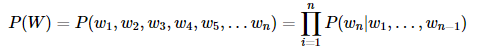

구글 검색창에서 검색해보면 단어들의 나열에 대해서 다음 단어를 예측하는 언어 모델을 사용하고 있다.

# 2) 통계적 언어 모델

통계적 언어 모델 (Statistical Language Model)은 줄여서 SLM이라고 한다.

## 1. 조건부 확률

조건부 확률의 연쇄 법칙 : P(x1,x2,x3...xn)=P(x1)P(x2|x1)P(x3|x1,x2)...P(xn|x1...xn−1)

## 2. 문장에 대한 확률

예를 들어 문장 'An adorable little boy is spreading smiles'의 확률 P(An adorable little boy is spreading smiles)를 식으로 표현해봅시다.
 
위의 3번에서 사용했던 식을 적용해보면 P(An adorable little boy is spreading smiles)= 
P(An)×P(adorable|An)×P(little|An adorable)×P(boy|An adorable little)×P(is|An adorable little boy) ×P(spreading|An adorable little boy is)×P(smiles|An adorable little boy is spreading) 와 같이 나온다

## 3. 카운트 기반의 접근

문장의 확률을 구하기 위해서 다음 단어에 대한 예측 확률을 모두 곱한다는 것은 알았습니다. 그렇다면 SLM은 이전 단어로부터 다음 단어에 대한 확률은 어떻게 구할까요? 정답은 카운트에 기반하여 확률을 계산합니다.

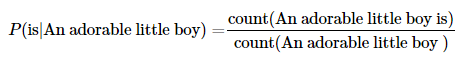

 An adorable little boy가 100번 등장했는데 그 다음에 is가 등장한 경우는 30번이라고 합시다. 이 경우 P(is|An adorable little boy)는 30%입니다.
 
## 4. 카운트 기반 접근의 한계 - 희소 문제

단어 시퀀스가 없어서 확률이 0 또는 정의되지 않을 수 있다. 이와 같이 충분한 데이터를 관측하지 못하여 언어를 정확히 모델링하지 못하는 문제를 희소 문제(sparsity problem)라고 합니다. 이와 같은 문제를 완화하기위해 n-gram or 스무딩 or 백오프같은 기법이 존재!! 이러한 한계로 인해 언어 트랜드는 통계적 언어 모델에서 인공 신경망 언어 모델로 넘어가게 된다.

# 3) N-gram 언어 모델 (N-gram Language Model)

모든 단어를 고려하는 것이 아니라 일부 단어만 고려하는 접근 방법을 사용합니다. 그리고 이때 일부 단어를 몇 개 보느냐를 결정하는데 이것이 n-gram에서의 n이 가지는 의미입니다.


## 1. 코퍼스에서 카운트하지 못하는 경우의 감소

SLM의 한계는 훈련 코퍼스에 확률을 계산하고 싶은 문장이나 단어가 없을 수 있다는 점입니다. 그리고 확률을 계산하고 싶은 문장이 길어질수록 갖고있는 코퍼스에서 그 문장이 존재하지 않을 가능성이 높습니다. 다시 말하면 카운트할 수 없을 가능성이 높습니다.

예를 들어 An adorable little boy 가 나왔을 때 is 가 나올 확률이 P(is|An adorable little boy)였다면 대신에 P(is|boy) 와 같이 boy 가 나왔을 때 is 가 나올 확률로 생각하자는 대안!

-->  이제는 단어의 확률을 구하고자 기준 단어의 앞 단어를 전부 포함해서 카운트하는 것이 아니라, 앞 단어 중 임의의 개수만 포함해서 카운트하여 근사하자는 것입니다. 이렇게 하면 갖고 있는 코퍼스에서 해당 단어의 시퀀스를 카운트할 확률이 높아집니다.

## 2. N-gram

이 때 임의의 개수를 정하기 위한 기준을 위해 사용하는 것이 n-gram 이다. 

- unigrams : an, adorable, little, boy, is, spreading, smiles
- bigrams : an adorable, adorable little, little boy, boy is, is spreading, spreading smiles
- trigrams : an adorable little, adorable little boy, little boy is, boy is spreading, is spreading smiles
- 4-grams : an adorable little boy, adorable little boy is, little boy is spreading, boy is spreading smiles

끊어주는 개수가 N 이다.

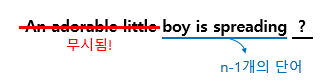

## 3. N-gram Language Model의 한계

 n-gram은 뒤의 단어 몇 개만 보다 보니 의도하고 싶은 대로 문장을 끝맺음하지 못하는 경우가 생긴다.   작고 사랑스러운(an adorable little) 를 반영했을 때 다른 것이 나타날 수도 있다.
 
 ### 1) 희소 문제(Sparsity Problem)
 문장에 존재하는 앞에 나온 단어를 모두 보는 것보다 일부 단어만을 보는 것으로 현실적으로 코퍼스에서 카운트 할 수 있는 확률을 높일 수는 있었지만, n-gram 언어 모델도 여전히 n-gram에 대한 희소 문제가 존재합니다.
 
 ### 2) n을 선택하는 것은 trade-off 문제
 
- n을 크게 선택하면 실제 훈련 코퍼스에서 해당 n-gram을 카운트할 수 있는 확률은 적어지므로 희소 문제는 점점 심각해집니다. 또한 n이 커질수록 모델 사이즈가 커진다는 문제점도 있습니다
 
- n을 작게 선택하면 훈련 코퍼스에서 카운트는 잘 되겠지만 근사의 정확도는 현실의 확률분포와 멀어집니다. 그렇기 때문에 적절한 n을 선택해야 합니다. 앞서 언급한 trade-off 문제로 인해 정확도를 높이려면 n은 최대 5를 넘게 잡아서는 안 된다고 권장되고 있습니다.


## 4. 적용 분야(Domain)에 맞는 코퍼스의 수집

분야에 따라 특정 단어들의 확률 분포는 다르다. -> 적용 분야에 따라서 다른 코퍼스를 수집해야된다.

## 5. 인공 신경망을 이용한 언어 모델
이를 위한 대안으로 N-gram Language Model보다 대체적으로 성능이 우수한 인공 신경망을 이용한 언어 모델이 많이 사용되고 있습니다.

# 4) 펄플렉서티(Perplexity)

두 개의 모델 A,B가 있을 때 모델의 성능은 어떻게 비교할 수 있을까?? ->모델 내에서 자신의 성능을 수치화하여 결과를 내놓는 내부 평가 - 펄플렉서티 

## 1. 언어 모델의 평가 방법 : PPL

perplexity -> 보통 줄여서 PPL 이라고 한다.  낮을수록 좋은 성능을 가지는 것!

##### PPL은 단어의 수로 정규화(normalization) 된 테스트 데이터에 대한 확률의 역수입니다.




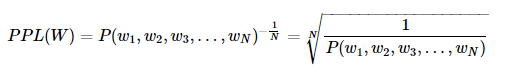